In [ ]:
!pip install -q libpysal
!pip install -q geopandas
!pip install -q mapclassify

     |████████████████████████████████| 2.4 MB 7.2 MB/s 
     |████████████████████████████████| 1.0 MB 11.2 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 16.7 MB 458 kB/s 


In [ ]:
# Bibliotecas
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt

In [ ]:
# Leitura do arquivo
gdf = gpd.read_file('MT_indices.shp')

In [ ]:
# Visualização das 5 primeiras linhas
gdf.head()

,CD_GEOCMU,firjan_Mun,FIRJAN,IDHM,IVS,geometry
0,5100102,Acorizal,0.648,0.628,0.398,"POLYGON ((-56.20270 -14.99069, -56.20158 -14.9..."
1,5100300,Alto Araguaia,0.726,0.704,0.242,"POLYGON ((-53.01380 -16.86532, -53.01380 -16.8..."
2,5100409,Alto Garças,0.801,0.701,0.252,"POLYGON ((-53.21107 -16.45766, -53.21106 -16.4..."
3,5100508,Alto Paraguai,0.605,0.638,0.479,"POLYGON ((-56.47631 -14.66725, -56.47580 -14.6..."
4,5100607,Alto Taquari,0.840,0.705,0.201,"POLYGON ((-53.24294 -17.60182, -53.24665 -17.6..."


In [ ]:
# Quantis 5 classes
gdf.plot(column='IVS', scheme='Quantiles', k=5, figsize=(12, 8),
         legend=True)

In [ ]:
# Quebras naturais 5 classes
gdf.plot(column='IVS', scheme='naturalbreaks', k=5, figsize=(12, 8),
         legend=True)

In [ ]:
# Intervalos iguais 5 classes
gdf.plot(column='IVS', scheme='equalinterval', k=5, figsize=(12, 8),
         legend=True)

In [ ]:
# Visualizando classes diretamente
q5 = mapclassify.Quantiles(gdf['IVS'],k=5)
q5

Quantiles           

  Interval     Count
--------------------
[0.19, 0.24] |    29
(0.24, 0.28] |    28
(0.28, 0.32] |    29
(0.32, 0.36] |    27
(0.36, 0.51] |    28

In [ ]:
dict_class = dict([(i,s) for i,s in enumerate(q5.get_legend_classes())])
dict_class

{0: '[0.19, 0.24]',
 1: '(0.24, 0.28]',
 2: '(0.28, 0.32]',
 3: '(0.32, 0.36]',
 4: '(0.36, 0.51]'}

In [ ]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
              txt.set_text(v)

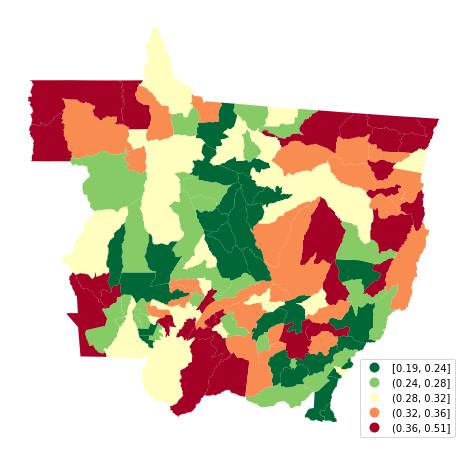

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))
gdf.assign(cl=q5.yb).plot(column='cl', categorical=True, 
        k=5, cmap='RdYlGn_r', linewidth=0.0, ax=ax,  legend=True,
                          legend_kwds={'loc': 'lower right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), dict_class)
plt.show()